In [9]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

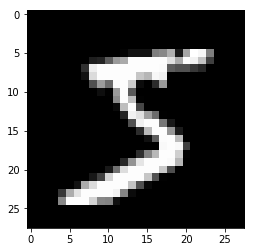

In [11]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes you get

# Define the generator here.
# The generator should have the following layers.
# Fully connected from # noise dimensions to 256
# LeakyReLU
# Fully connected from 256 to 512
# LeakyReLU
# Fully connected from 512 to 1024
# LeakyReLU
# Fully connected from 1024 to 784 (28*28)
# tanh (To normalize our output from -1 to 1)

def generator():
    ###################################
    #TODO: Implement
    model = Sequential()
    
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(Dense(784))
    model.add(Activation('tanh'))
    
    return model
    ###################################

In [18]:
# Define the discriminator here.
# Should have the following layers
# Fully connected from 784 (28*28) to 1024
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 1024 to 512
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 512 to 256
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 256 to 1
# sigmoid (to get our probability)

def discriminator():
    ###################################
    #TODO: Implement
    model = Sequential()
    
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model
    ###################################

In [19]:
# Feed the generated image into the discriminator. 
# We’ll use this to train our generator end-to-end later on, 
    # while leaving the discriminator weights untouched
# Remember that we are not updating our discriminator in this step. 
# Hint: we can add existing Sequential() models to new models, just like we can with any other layer.
    # The parameters are then "passed by reference," so that they use the same internal weights.

# Please refer to 
# https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers
# on how to "freeze" or set layers to be untrainable in keras.
# we can call this operation on an entire model.

def combine(generator, discriminator):
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    
    return model
    ###################################

In [23]:
# Compile the discriminator, generator, and full GAN. 
# Probably use Adam optimizer...

#############################################
# TODO: Compile generator and discriminator

LOSS = 'binary_crossentropy'
OPTIMIZER = Adam(lr=0.0002, beta_1=0.5)

# Discriminator
d = discriminator()
d.compile(loss = LOSS, optimizer = OPTIMIZER)

# Generator
g = generator()
g.compile(loss = LOSS, optimizer = OPTIMIZER)

# Full gan
dg = combine(g, d)
dg.compile(loss = LOSS, optimizer = OPTIMIZER)

#############################################

In [24]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


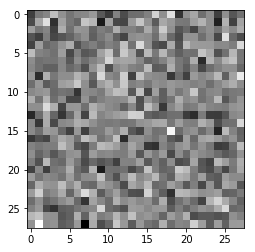

Number batches 78
0(0/78) D: 0.8520, G: 0.6901
0(1/78) D: 0.4197, G: 0.6740
0(2/78) D: 0.3829, G: 0.6527
0(3/78) D: 0.3897, G: 0.6307
0(4/78) D: 0.4044, G: 0.6096
0(5/78) D: 0.4248, G: 0.5953
0(6/78) D: 0.4421, G: 0.5836
0(7/78) D: 0.4464, G: 0.5964
0(8/78) D: 0.4451, G: 0.6215
0(9/78) D: 0.4346, G: 0.6673
0(10/78) D: 0.4149, G: 0.7197
0(11/78) D: 0.3986, G: 0.7746
0(12/78) D: 0.3922, G: 0.7794
0(13/78) D: 0.4010, G: 0.7809
0(14/78) D: 0.4125, G: 0.8082
0(15/78) D: 0.4229, G: 0.7792
0(16/78) D: 0.4415, G: 0.7336
0(17/78) D: 0.4601, G: 0.7777
0(18/78) D: 0.4721, G: 0.7052
0(19/78) D: 0.4647, G: 0.7803
0(20/78) D: 0.4443, G: 0.8414
0(21/78) D: 0.4478, G: 0.7557
0(22/78) D: 0.4593, G: 0.8464
0(23/78) D: 0.4334, G: 0.9438
0(24/78) D: 0.4433, G: 0.8005
0(25/78) D: 0.4850, G: 0.9009
0(26/78) D: 0.4601, G: 0.9555
0(27/78) D: 0.4498, G: 0.8911
0(28/78) D: 0.4617, G: 0.9390
0(29/78) D: 0.4385, G: 1.0073
0(30/78) D: 0.4132, G: 0.9924
0(31/78) D: 0.3922, G: 1.1395
0(32/78) D: 0.3858, G: 0.9164
0(

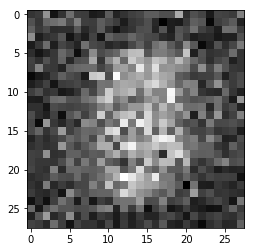

Number batches 78
1(0/78) D: 0.4959, G: 0.8662
1(1/78) D: 0.4753, G: 1.0571
1(2/78) D: 0.4536, G: 1.0698
1(3/78) D: 0.4396, G: 1.2644
1(4/78) D: 0.4467, G: 1.0487
1(5/78) D: 0.4877, G: 1.9644
1(6/78) D: 0.7227, G: 0.3245
1(7/78) D: 0.8973, G: 0.8796
1(8/78) D: 0.4125, G: 1.5363
1(9/78) D: 0.4737, G: 1.1573
1(10/78) D: 0.3778, G: 1.0572
1(11/78) D: 0.4288, G: 1.3769
1(12/78) D: 0.5000, G: 0.7239
1(13/78) D: 0.5608, G: 1.1979
1(14/78) D: 0.5080, G: 0.8227
1(15/78) D: 0.4466, G: 1.1820
1(16/78) D: 0.3433, G: 1.4762
1(17/78) D: 0.3238, G: 1.2003
1(18/78) D: 0.3533, G: 1.4916
1(19/78) D: 0.3424, G: 1.3822
1(20/78) D: 0.3371, G: 1.4667
1(21/78) D: 0.4401, G: 0.7378
1(22/78) D: 0.5623, G: 1.1343
1(23/78) D: 0.4514, G: 0.9634
1(24/78) D: 0.4079, G: 0.9216
1(25/78) D: 0.3887, G: 1.1342
1(26/78) D: 0.3226, G: 1.2096
1(27/78) D: 0.2911, G: 1.3218
1(28/78) D: 0.2860, G: 1.3654
1(29/78) D: 0.2700, G: 1.5358
1(30/78) D: 0.2654, G: 1.3544
1(31/78) D: 0.2849, G: 1.5776
1(32/78) D: 0.2834, G: 1.2981
1(

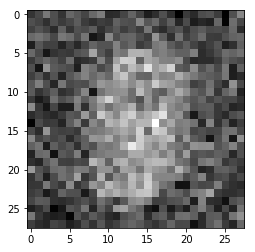

Number batches 78
2(0/78) D: 0.2419, G: 1.4574
2(1/78) D: 0.2827, G: 1.8227
2(2/78) D: 0.2551, G: 1.2868
2(3/78) D: 0.2720, G: 1.9426
2(4/78) D: 0.1776, G: 1.8449
2(5/78) D: 0.1508, G: 1.8949
2(6/78) D: 0.1541, G: 1.9748
2(7/78) D: 0.1462, G: 1.9774
2(8/78) D: 0.1650, G: 1.8970
2(9/78) D: 0.1599, G: 1.8612
2(10/78) D: 0.1583, G: 1.9244
2(11/78) D: 0.1699, G: 1.6519
2(12/78) D: 0.1751, G: 1.9298
2(13/78) D: 0.1335, G: 2.1740
2(14/78) D: 0.1435, G: 1.9506
2(15/78) D: 0.1312, G: 1.9479
2(16/78) D: 0.1441, G: 2.0202
2(17/78) D: 0.1707, G: 1.8807
2(18/78) D: 0.2045, G: 1.6748
2(19/78) D: 0.2011, G: 1.6982
2(20/78) D: 0.1782, G: 2.0723
2(21/78) D: 0.1140, G: 2.3820
2(22/78) D: 0.0831, G: 2.5116
2(23/78) D: 0.0824, G: 2.5157
2(24/78) D: 0.0994, G: 2.3518
2(25/78) D: 0.1368, G: 2.2413
2(26/78) D: 0.1573, G: 2.3036
2(27/78) D: 0.1553, G: 2.4454
2(28/78) D: 0.1163, G: 2.6346
2(29/78) D: 0.1087, G: 2.7079
2(30/78) D: 0.1045, G: 2.7447
2(31/78) D: 0.1228, G: 2.3500
2(32/78) D: 0.1585, G: 2.5453
2(

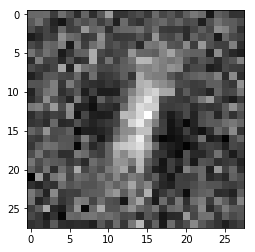

Number batches 78
3(0/78) D: 0.2517, G: 2.6965
3(1/78) D: 0.3383, G: 1.8249
3(2/78) D: 0.2514, G: 1.7213
3(3/78) D: 0.3387, G: 1.9641
3(4/78) D: 0.3402, G: 1.6198
3(5/78) D: 0.4183, G: 2.5394
3(6/78) D: 0.5590, G: 0.3726
3(7/78) D: 1.0165, G: 1.9625
3(8/78) D: 0.4306, G: 1.5256
3(9/78) D: 0.3114, G: 1.4575
3(10/78) D: 0.2897, G: 1.8226
3(11/78) D: 0.2677, G: 1.8104
3(12/78) D: 0.2842, G: 1.6150
3(13/78) D: 0.3144, G: 1.9603
3(14/78) D: 0.3078, G: 1.4970
3(15/78) D: 0.3208, G: 3.0520
3(16/78) D: 0.4418, G: 0.4288
3(17/78) D: 0.8192, G: 2.9699
3(18/78) D: 0.5855, G: 1.2458
3(19/78) D: 0.3353, G: 1.5056
3(20/78) D: 0.2480, G: 2.0716
3(21/78) D: 0.2502, G: 1.7260
3(22/78) D: 0.2218, G: 1.7215
3(23/78) D: 0.2311, G: 2.1355
3(24/78) D: 0.2362, G: 1.7230
3(25/78) D: 0.2556, G: 2.4094
3(26/78) D: 0.2966, G: 1.1071
3(27/78) D: 0.4271, G: 3.3773
3(28/78) D: 0.4648, G: 1.4895
3(29/78) D: 0.3069, G: 2.0222
3(30/78) D: 0.1836, G: 2.2523
3(31/78) D: 0.1518, G: 2.5221
3(32/78) D: 0.1769, G: 1.9945
3(

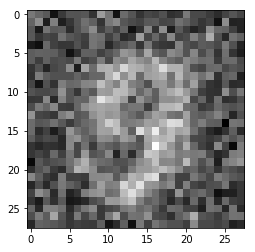

Number batches 78
4(0/78) D: 0.4989, G: 1.3579
4(1/78) D: 0.4340, G: 1.9609
4(2/78) D: 0.3702, G: 2.7753
4(3/78) D: 0.4168, G: 1.1674
4(4/78) D: 0.5673, G: 3.1474
4(5/78) D: 0.5126, G: 0.8333
4(6/78) D: 0.5702, G: 2.2110
4(7/78) D: 0.3471, G: 2.1441
4(8/78) D: 0.3625, G: 1.0536
4(9/78) D: 0.5001, G: 3.1052
4(10/78) D: 0.3719, G: 1.3274
4(11/78) D: 0.4404, G: 2.1518
4(12/78) D: 0.3184, G: 1.7669
4(13/78) D: 0.3040, G: 1.8784
4(14/78) D: 0.3514, G: 2.7614
4(15/78) D: 0.3398, G: 0.9573
4(16/78) D: 0.5727, G: 3.7208
4(17/78) D: 0.8674, G: 0.5027
4(18/78) D: 0.7393, G: 1.1751
4(19/78) D: 0.3857, G: 1.9241
4(20/78) D: 0.2494, G: 2.1657
4(21/78) D: 0.2765, G: 1.6701
4(22/78) D: 0.2146, G: 1.8336
4(23/78) D: 0.2101, G: 2.2121
4(24/78) D: 0.2367, G: 1.8628
4(25/78) D: 0.2494, G: 2.0689
4(26/78) D: 0.2830, G: 2.3127
4(27/78) D: 0.3132, G: 1.5369
4(28/78) D: 0.3907, G: 3.5043
4(29/78) D: 0.6673, G: 0.2492
4(30/78) D: 1.1480, G: 2.7241
4(31/78) D: 0.4325, G: 2.2820
4(32/78) D: 0.4300, G: 1.1481
4(

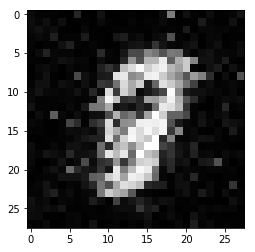

Number batches 78
5(0/78) D: 0.9788, G: 0.5013
5(1/78) D: 0.8087, G: 2.5639
5(2/78) D: 0.3941, G: 2.0856
5(3/78) D: 0.2570, G: 1.8339
5(4/78) D: 0.2459, G: 2.1492
5(5/78) D: 0.2640, G: 2.0546
5(6/78) D: 0.2736, G: 2.0409
5(7/78) D: 0.2719, G: 2.4205
5(8/78) D: 0.3313, G: 1.4547
5(9/78) D: 0.4379, G: 2.9465
5(10/78) D: 0.5030, G: 0.8341
5(11/78) D: 0.5755, G: 3.6893
5(12/78) D: 0.8601, G: 0.7487
5(13/78) D: 0.5482, G: 1.7646
5(14/78) D: 0.2895, G: 2.5420
5(15/78) D: 0.2695, G: 1.9967
5(16/78) D: 0.2319, G: 1.7086
5(17/78) D: 0.3100, G: 2.2273
5(18/78) D: 0.3275, G: 1.7861
5(19/78) D: 0.3858, G: 2.2642
5(20/78) D: 0.3472, G: 1.8568
5(21/78) D: 0.3245, G: 2.3797
5(22/78) D: 0.2896, G: 1.9781
5(23/78) D: 0.3469, G: 2.2688
5(24/78) D: 0.3118, G: 1.6540
5(25/78) D: 0.3497, G: 3.6394
5(26/78) D: 0.3551, G: 0.9876
5(27/78) D: 0.4282, G: 4.2249
5(28/78) D: 0.3917, G: 2.2156
5(29/78) D: 0.1715, G: 1.7415
5(30/78) D: 0.2358, G: 3.0937
5(31/78) D: 0.2127, G: 2.3361
5(32/78) D: 0.1942, G: 2.5984
5(

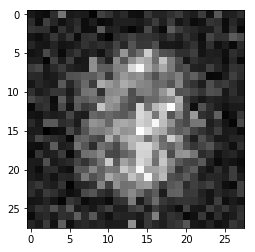

Number batches 78
6(0/78) D: 0.4361, G: 1.4556
6(1/78) D: 0.4113, G: 1.6051
6(2/78) D: 0.3677, G: 1.4547
6(3/78) D: 0.4208, G: 1.5848
6(4/78) D: 0.3600, G: 1.4867
6(5/78) D: 0.4055, G: 1.3026
6(6/78) D: 0.3971, G: 1.9984
6(7/78) D: 0.4567, G: 1.2974
6(8/78) D: 0.4191, G: 1.5512
6(9/78) D: 0.3872, G: 1.8149
6(10/78) D: 0.3629, G: 1.5723
6(11/78) D: 0.4348, G: 1.6160
6(12/78) D: 0.4181, G: 1.6488
6(13/78) D: 0.4458, G: 1.3592
6(14/78) D: 0.3500, G: 2.2742
6(15/78) D: 0.3825, G: 1.2323
6(16/78) D: 0.3911, G: 2.4801
6(17/78) D: 0.4091, G: 1.3449
6(18/78) D: 0.4286, G: 1.7864
6(19/78) D: 0.3750, G: 1.5780
6(20/78) D: 0.3631, G: 2.4161
6(21/78) D: 0.3622, G: 1.2218
6(22/78) D: 0.3976, G: 2.6419
6(23/78) D: 0.4545, G: 0.8994
6(24/78) D: 0.5095, G: 2.2504
6(25/78) D: 0.3939, G: 1.5601
6(26/78) D: 0.3603, G: 1.2268
6(27/78) D: 0.3602, G: 2.3189
6(28/78) D: 0.3526, G: 1.4985
6(29/78) D: 0.3006, G: 1.9740
6(30/78) D: 0.3415, G: 1.5510
6(31/78) D: 0.3253, G: 2.3242
6(32/78) D: 0.3677, G: 1.0326
6(

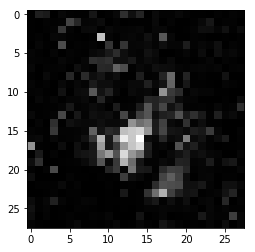

Number batches 78
7(0/78) D: 0.4580, G: 2.8999
7(1/78) D: 0.4184, G: 1.7138
7(2/78) D: 0.3958, G: 2.9289
7(3/78) D: 0.3923, G: 0.9320
7(4/78) D: 0.5611, G: 5.1221
7(5/78) D: 1.1257, G: 0.8348
7(6/78) D: 0.6553, G: 2.4441
7(7/78) D: 0.2902, G: 2.9926
7(8/78) D: 0.3970, G: 1.5531
7(9/78) D: 0.3540, G: 1.8100
7(10/78) D: 0.2824, G: 2.2382
7(11/78) D: 0.3049, G: 1.9871
7(12/78) D: 0.3121, G: 2.0448
7(13/78) D: 0.3159, G: 1.8324
7(14/78) D: 0.3194, G: 2.6386
7(15/78) D: 0.4281, G: 1.2990
7(16/78) D: 0.4130, G: 3.2186
7(17/78) D: 0.5405, G: 0.9898
7(18/78) D: 0.6239, G: 3.1649
7(19/78) D: 0.5571, G: 1.5420
7(20/78) D: 0.3143, G: 1.4155
7(21/78) D: 0.3587, G: 2.4570
7(22/78) D: 0.3720, G: 1.8825
7(23/78) D: 0.3235, G: 1.6471
7(24/78) D: 0.3449, G: 2.2715
7(25/78) D: 0.2856, G: 1.9366
7(26/78) D: 0.3046, G: 2.4243
7(27/78) D: 0.3918, G: 1.0995
7(28/78) D: 0.4886, G: 3.5418
7(29/78) D: 0.5607, G: 1.3300
7(30/78) D: 0.4204, G: 2.0090
7(31/78) D: 0.2931, G: 2.2000
7(32/78) D: 0.3225, G: 1.6204
7(

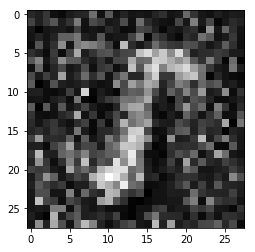

Number batches 78
8(0/78) D: 0.3343, G: 2.1446
8(1/78) D: 0.3809, G: 1.4331
8(2/78) D: 0.3860, G: 3.1345
8(3/78) D: 0.3412, G: 1.6028
8(4/78) D: 0.3094, G: 2.7263
8(5/78) D: 0.2726, G: 2.4866
8(6/78) D: 0.2731, G: 2.1339
8(7/78) D: 0.3074, G: 3.2079
8(8/78) D: 0.4239, G: 0.8026
8(9/78) D: 0.6515, G: 4.8089
8(10/78) D: 0.8075, G: 1.7166
8(11/78) D: 0.4166, G: 1.5855
8(12/78) D: 0.4214, G: 2.7840
8(13/78) D: 0.4279, G: 1.7524
8(14/78) D: 0.3576, G: 1.7494
8(15/78) D: 0.3473, G: 2.4910
8(16/78) D: 0.4026, G: 1.6851
8(17/78) D: 0.3842, G: 2.5207
8(18/78) D: 0.3211, G: 1.9423
8(19/78) D: 0.3168, G: 1.8913
8(20/78) D: 0.3369, G: 2.4913
8(21/78) D: 0.4168, G: 1.6410
8(22/78) D: 0.3796, G: 2.5250
8(23/78) D: 0.3575, G: 1.8188
8(24/78) D: 0.3056, G: 3.1422
8(25/78) D: 0.5034, G: 0.6855
8(26/78) D: 0.6826, G: 4.5050
8(27/78) D: 0.7803, G: 1.6062
8(28/78) D: 0.3537, G: 1.5409
8(29/78) D: 0.3640, G: 2.5843
8(30/78) D: 0.3249, G: 2.1677
8(31/78) D: 0.2518, G: 1.6900
8(32/78) D: 0.3396, G: 2.2533
8(

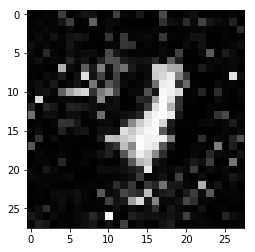

Number batches 78
9(0/78) D: 0.3469, G: 2.9503
9(1/78) D: 0.2325, G: 2.5963
9(2/78) D: 0.2696, G: 1.8436
9(3/78) D: 0.3227, G: 2.2924
9(4/78) D: 0.2708, G: 2.5372
9(5/78) D: 0.3765, G: 1.6882
9(6/78) D: 0.3769, G: 3.6048
9(7/78) D: 0.5186, G: 0.9470
9(8/78) D: 0.5952, G: 4.0427
9(9/78) D: 0.7537, G: 1.5775
9(10/78) D: 0.3175, G: 1.7769
9(11/78) D: 0.3126, G: 2.6126
9(12/78) D: 0.3913, G: 2.1087
9(13/78) D: 0.3467, G: 1.6272
9(14/78) D: 0.3287, G: 2.6513
9(15/78) D: 0.3334, G: 2.0587
9(16/78) D: 0.3046, G: 2.2988
9(17/78) D: 0.3339, G: 2.0872
9(18/78) D: 0.2982, G: 2.6485
9(19/78) D: 0.3665, G: 1.7310
9(20/78) D: 0.3678, G: 3.1006
9(21/78) D: 0.2757, G: 2.1909
9(22/78) D: 0.2694, G: 1.9572
9(23/78) D: 0.2837, G: 2.8381
9(24/78) D: 0.3008, G: 1.7785
9(25/78) D: 0.2893, G: 2.7781
9(26/78) D: 0.2721, G: 2.2678
9(27/78) D: 0.2574, G: 2.2540
9(28/78) D: 0.2891, G: 2.8194
9(29/78) D: 0.2945, G: 1.6970
9(30/78) D: 0.3354, G: 3.9866
9(31/78) D: 0.4509, G: 0.7685
9(32/78) D: 0.7161, G: 5.4063
9(

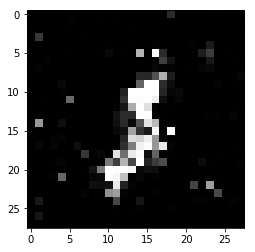

Number batches 78
10(0/78) D: 0.4192, G: 1.6102
10(1/78) D: 0.3703, G: 2.2905
10(2/78) D: 0.3195, G: 1.6781
10(3/78) D: 0.3327, G: 2.0896
10(4/78) D: 0.2723, G: 2.4452
10(5/78) D: 0.2283, G: 2.2897
10(6/78) D: 0.2878, G: 2.3483
10(7/78) D: 0.2427, G: 2.8700
10(8/78) D: 0.3050, G: 1.7170
10(9/78) D: 0.3669, G: 3.6339
10(10/78) D: 0.3512, G: 1.8849
10(11/78) D: 0.4011, G: 2.6839
10(12/78) D: 0.2746, G: 2.3522
10(13/78) D: 0.3515, G: 2.7858
10(14/78) D: 0.3156, G: 2.3323
10(15/78) D: 0.3288, G: 3.1902
10(16/78) D: 0.4003, G: 1.6504
10(17/78) D: 0.4206, G: 4.5326
10(18/78) D: 0.7755, G: 0.6217
10(19/78) D: 0.9773, G: 4.1905
10(20/78) D: 0.5346, G: 2.6262
10(21/78) D: 0.3741, G: 1.3527
10(22/78) D: 0.4416, G: 2.0173
10(23/78) D: 0.2643, G: 2.7693
10(24/78) D: 0.3243, G: 1.9032
10(25/78) D: 0.2700, G: 1.9238
10(26/78) D: 0.3136, G: 2.4520
10(27/78) D: 0.2479, G: 2.3432
10(28/78) D: 0.3084, G: 2.2972
10(29/78) D: 0.2717, G: 2.1051
10(30/78) D: 0.2926, G: 2.3682
10(31/78) D: 0.2793, G: 2.4134


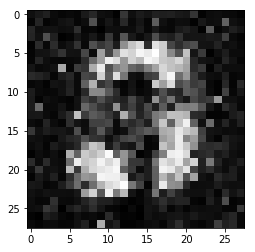

Number batches 78
11(0/78) D: 0.4148, G: 2.0824
11(1/78) D: 0.3971, G: 1.8038
11(2/78) D: 0.3746, G: 1.7826
11(3/78) D: 0.3639, G: 2.2402
11(4/78) D: 0.3633, G: 1.1054
11(5/78) D: 0.4808, G: 3.6544
11(6/78) D: 0.6615, G: 0.8398
11(7/78) D: 0.6151, G: 3.0856
11(8/78) D: 0.5682, G: 1.3124
11(9/78) D: 0.3669, G: 2.1553
11(10/78) D: 0.3143, G: 2.3544
11(11/78) D: 0.3401, G: 1.5961
11(12/78) D: 0.3217, G: 2.3744
11(13/78) D: 0.3907, G: 1.8534
11(14/78) D: 0.3141, G: 2.8686
11(15/78) D: 0.3626, G: 1.5304
11(16/78) D: 0.3889, G: 2.5596
11(17/78) D: 0.3397, G: 2.1036
11(18/78) D: 0.4081, G: 1.5506
11(19/78) D: 0.4121, G: 2.3926
11(20/78) D: 0.3837, G: 2.0977
11(21/78) D: 0.3606, G: 1.6560
11(22/78) D: 0.4301, G: 3.2225
11(23/78) D: 0.5435, G: 0.6807
11(24/78) D: 0.6700, G: 4.4648
11(25/78) D: 0.9756, G: 1.7704
11(26/78) D: 0.3426, G: 0.9687
11(27/78) D: 0.4335, G: 2.2828
11(28/78) D: 0.2304, G: 2.6347
11(29/78) D: 0.2685, G: 1.8100
11(30/78) D: 0.2351, G: 1.8322
11(31/78) D: 0.2553, G: 2.3441


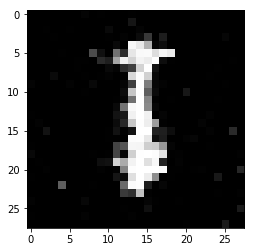

Number batches 78
12(0/78) D: 0.3159, G: 2.8011
12(1/78) D: 0.2309, G: 2.1161
12(2/78) D: 0.2476, G: 2.6212
12(3/78) D: 0.2970, G: 2.0744
12(4/78) D: 0.2858, G: 2.9811
12(5/78) D: 0.2649, G: 2.5463
12(6/78) D: 0.2382, G: 2.8080
12(7/78) D: 0.2851, G: 2.3521
12(8/78) D: 0.3253, G: 2.1198
12(9/78) D: 0.2973, G: 3.7172
12(10/78) D: 0.2283, G: 2.2761
12(11/78) D: 0.3139, G: 1.3250
12(12/78) D: 0.4809, G: 5.3475
12(13/78) D: 0.8793, G: 1.4156
12(14/78) D: 0.3862, G: 2.2183
12(15/78) D: 0.2494, G: 3.0379
12(16/78) D: 0.2720, G: 2.2959
12(17/78) D: 0.2171, G: 2.3311
12(18/78) D: 0.2677, G: 2.2764
12(19/78) D: 0.2144, G: 2.7959
12(20/78) D: 0.2290, G: 2.1408
12(21/78) D: 0.2487, G: 2.4396
12(22/78) D: 0.2439, G: 2.5716
12(23/78) D: 0.2786, G: 2.3566
12(24/78) D: 0.2743, G: 2.6212
12(25/78) D: 0.2871, G: 1.6191
12(26/78) D: 0.3122, G: 3.6042
12(27/78) D: 0.4623, G: 0.7247
12(28/78) D: 0.7594, G: 6.4379
12(29/78) D: 1.3165, G: 2.7120
12(30/78) D: 0.4531, G: 0.8188
12(31/78) D: 0.5629, G: 2.6138


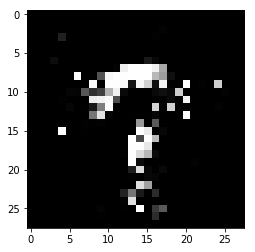

Number batches 78
13(0/78) D: 0.2789, G: 2.7269
13(1/78) D: 0.2636, G: 2.3713
13(2/78) D: 0.2666, G: 1.8580
13(3/78) D: 0.3046, G: 2.9936
13(4/78) D: 0.2557, G: 1.8611
13(5/78) D: 0.3000, G: 2.3372
13(6/78) D: 0.2570, G: 2.5742
13(7/78) D: 0.3310, G: 2.2352
13(8/78) D: 0.3459, G: 2.1142
13(9/78) D: 0.3240, G: 2.2468
13(10/78) D: 0.2965, G: 2.7823
13(11/78) D: 0.3113, G: 1.5575
13(12/78) D: 0.3340, G: 3.4771
13(13/78) D: 0.4437, G: 1.5234
13(14/78) D: 0.3785, G: 2.8094
13(15/78) D: 0.3869, G: 1.7553
13(16/78) D: 0.2726, G: 2.5095
13(17/78) D: 0.2849, G: 2.2993
13(18/78) D: 0.3008, G: 2.1943
13(19/78) D: 0.2610, G: 2.9559
13(20/78) D: 0.3069, G: 1.2174
13(21/78) D: 0.3776, G: 3.9144
13(22/78) D: 0.5156, G: 1.7827
13(23/78) D: 0.2775, G: 2.0461
13(24/78) D: 0.2537, G: 2.2550
13(25/78) D: 0.2701, G: 1.8630
13(26/78) D: 0.3017, G: 2.4619
13(27/78) D: 0.3101, G: 2.2629
13(28/78) D: 0.3034, G: 2.3652
13(29/78) D: 0.2553, G: 1.7821
13(30/78) D: 0.2610, G: 2.9180
13(31/78) D: 0.2695, G: 1.7350


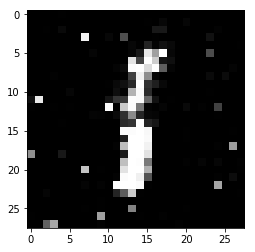

Number batches 78
14(0/78) D: 0.3009, G: 2.9341
14(1/78) D: 0.2901, G: 2.0296
14(2/78) D: 0.3033, G: 3.4527
14(3/78) D: 0.3578, G: 1.5130
14(4/78) D: 0.2905, G: 3.4643
14(5/78) D: 0.3341, G: 2.2754
14(6/78) D: 0.2454, G: 2.6259
14(7/78) D: 0.2158, G: 2.6036
14(8/78) D: 0.2893, G: 2.0204
14(9/78) D: 0.3029, G: 3.8967
14(10/78) D: 0.2491, G: 2.5491
14(11/78) D: 0.2496, G: 2.1964
14(12/78) D: 0.3015, G: 3.3172
14(13/78) D: 0.2693, G: 1.7973
14(14/78) D: 0.3056, G: 3.3256
14(15/78) D: 0.2688, G: 2.2761
14(16/78) D: 0.2345, G: 1.9538
14(17/78) D: 0.2600, G: 3.7502
14(18/78) D: 0.4366, G: 1.3402
14(19/78) D: 0.3757, G: 4.1015
14(20/78) D: 0.3350, G: 2.8296
14(21/78) D: 0.2646, G: 1.8535
14(22/78) D: 0.2988, G: 3.6459
14(23/78) D: 0.2382, G: 2.7591
14(24/78) D: 0.2427, G: 1.7536
14(25/78) D: 0.2977, G: 3.7889
14(26/78) D: 0.3569, G: 1.5353
14(27/78) D: 0.3336, G: 3.8226
14(28/78) D: 0.2669, G: 2.5174
14(29/78) D: 0.1893, G: 2.0430
14(30/78) D: 0.2691, G: 3.4414
14(31/78) D: 0.2529, G: 1.8740


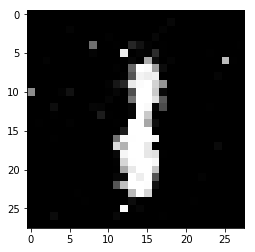

Number batches 78
15(0/78) D: 0.1857, G: 2.8293
15(1/78) D: 0.2432, G: 2.5727
15(2/78) D: 0.2262, G: 2.9590
15(3/78) D: 0.2757, G: 2.3249
15(4/78) D: 0.2924, G: 3.0415
15(5/78) D: 0.1795, G: 2.6607
15(6/78) D: 0.1603, G: 3.1539
15(7/78) D: 0.1873, G: 2.8682
15(8/78) D: 0.2671, G: 2.2510
15(9/78) D: 0.2544, G: 3.8690
15(10/78) D: 0.1664, G: 3.2279
15(11/78) D: 0.2067, G: 1.7106
15(12/78) D: 0.2918, G: 5.0105
15(13/78) D: 0.4280, G: 2.1229
15(14/78) D: 0.2943, G: 3.0099
15(15/78) D: 0.2251, G: 2.8275
15(16/78) D: 0.2057, G: 2.5223
15(17/78) D: 0.1911, G: 3.3419
15(18/78) D: 0.2602, G: 2.8679
15(19/78) D: 0.1607, G: 2.6564
15(20/78) D: 0.1951, G: 3.0537
15(21/78) D: 0.2105, G: 2.3977
15(22/78) D: 0.1937, G: 3.0542
15(23/78) D: 0.2523, G: 2.1757
15(24/78) D: 0.2651, G: 3.1844
15(25/78) D: 0.2681, G: 2.4718
15(26/78) D: 0.2554, G: 2.6074
15(27/78) D: 0.2191, G: 2.7173
15(28/78) D: 0.2002, G: 3.7559
15(29/78) D: 0.2223, G: 2.1677
15(30/78) D: 0.2795, G: 4.9456
15(31/78) D: 0.3789, G: 2.2273


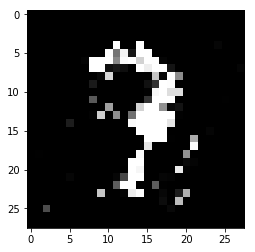

Number batches 78
16(0/78) D: 0.2046, G: 3.4944
16(1/78) D: 0.2961, G: 1.8009
16(2/78) D: 0.2638, G: 4.0134
16(3/78) D: 0.2670, G: 2.0189
16(4/78) D: 0.2938, G: 3.9840
16(5/78) D: 0.2731, G: 2.4619
16(6/78) D: 0.2097, G: 3.3257
16(7/78) D: 0.2105, G: 3.3445
16(8/78) D: 0.2252, G: 2.2799
16(9/78) D: 0.2941, G: 4.7995
16(10/78) D: 0.2945, G: 1.9096
16(11/78) D: 0.2667, G: 4.0088
16(12/78) D: 0.2308, G: 2.4927
16(13/78) D: 0.2469, G: 3.5457
16(14/78) D: 0.2773, G: 2.2017
16(15/78) D: 0.2599, G: 3.6875
16(16/78) D: 0.2100, G: 1.7812
16(17/78) D: 0.3215, G: 5.2734
16(18/78) D: 0.5448, G: 0.9445
16(19/78) D: 0.5180, G: 4.6639
16(20/78) D: 0.2982, G: 3.6665
16(21/78) D: 0.3048, G: 1.7742
16(22/78) D: 0.2886, G: 2.4015
16(23/78) D: 0.2081, G: 3.4214
16(24/78) D: 0.1986, G: 3.0540
16(25/78) D: 0.2421, G: 1.6826
16(26/78) D: 0.2914, G: 3.4906
16(27/78) D: 0.2638, G: 2.7883
16(28/78) D: 0.1633, G: 2.5527
16(29/78) D: 0.2024, G: 3.0873
16(30/78) D: 0.2495, G: 2.5246
16(31/78) D: 0.2130, G: 3.0690


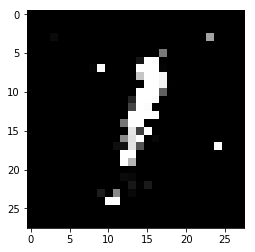

Number batches 78
17(0/78) D: 0.1989, G: 2.0582
17(1/78) D: 0.1954, G: 2.8757
17(2/78) D: 0.1859, G: 2.5288
17(3/78) D: 0.2053, G: 3.0301
17(4/78) D: 0.2119, G: 2.4803
17(5/78) D: 0.1740, G: 2.5091
17(6/78) D: 0.2213, G: 2.6797
17(7/78) D: 0.1718, G: 2.6626
17(8/78) D: 0.2437, G: 1.9875
17(9/78) D: 0.2451, G: 4.3653
17(10/78) D: 0.2411, G: 2.9277
17(11/78) D: 0.2686, G: 1.3276
17(12/78) D: 0.5381, G: 6.0148
17(13/78) D: 0.8586, G: 2.3679
17(14/78) D: 0.2969, G: 2.0055
17(15/78) D: 0.2071, G: 3.5738
17(16/78) D: 0.2279, G: 3.2994
17(17/78) D: 0.1238, G: 2.6950
17(18/78) D: 0.1574, G: 2.8059
17(19/78) D: 0.1869, G: 3.0810
17(20/78) D: 0.1769, G: 2.5243
17(21/78) D: 0.1874, G: 3.0435
17(22/78) D: 0.1912, G: 2.9573
17(23/78) D: 0.2079, G: 2.0273
17(24/78) D: 0.2477, G: 3.6815
17(25/78) D: 0.3209, G: 1.6440
17(26/78) D: 0.3101, G: 4.0469
17(27/78) D: 0.3411, G: 1.9247
17(28/78) D: 0.2722, G: 3.2402
17(29/78) D: 0.2420, G: 3.1096
17(30/78) D: 0.2128, G: 1.7553
17(31/78) D: 0.2781, G: 4.0428


In [ ]:
# Keep this. 
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        #######################################################
        #TODO: Complete a training iteration
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Train the discriminator using the generated images and the real images.
        # Contains the real and fake images.
        X = np.concatenate((generated_images, real_images))
        
        # Labels if the sample is real (1) or not real (0). 
        y = [0] * batch_size + [1] * batch_size
        
        # Remember that the discriminator has to have d.trainable = True!
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Get the g_loss (fill in the ... part between the parantheses)
        g_loss = dg.train_on_batch(noise, [1]*batch_size)
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))
        
        #######################################################

#########################################################################################
# Why is my generative loss oscillating???   
# Don't worry this is normal as the generator is oscillating between possible solutions
#########################################################################################
        